[View in Colaboratory](https://colab.research.google.com/github/Kp30091998/MNIST-number-recognition/blob/master/CII_MNIST.ipynb)

# MNIST DATA



The MNIST data set is a standard dataset comprising of images of handwritten digits. The following is a CNN implementation over the MNIST data and it would be desired to have a GPU to train the model faster. From the Menu choose:
  
  Runtime->Change runtime type 
  
  and from the hardware accelerator dropdown, choose GPU

In [2]:
# importing libs
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, MaxPooling2D
from keras import losses

def load_data():
  # Load training and eval data
    mnist = tf.contrib.learn.datasets.load_dataset("mnist")
    train_data = mnist.train.images # Returns np.array
    train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
    test_data = mnist.test.images # Returns np.array
    test_labels = np.asarray(mnist.test.labels, dtype=np.int32)
    return train_data, train_labels, test_data, test_labels

train_data, train_labels, test_data, test_labels = load_data()

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


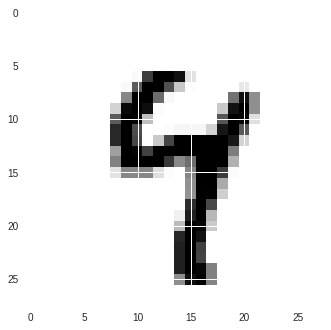

In [0]:
some_digit = train_data[2] #choose some digit
some_digit_image = some_digit.reshape(28,28) # the images are stored in a 1-d array. reshape to square to visualize them as images
plt.imshow(some_digit_image,cmap = plt.cm.binary)
plt.show()

# Creating a Model using Keras
We shall be using the Sequential API of keras. This provides for a simple way to build models where layers are sequentially stacked.

In [0]:
#Reshaping so as to comply with the requirements of One hot encoder.
train_labels_reshaped = train_labels.reshape(-1,1)
test_labels_reshaped = test_labels.reshape(-1,1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
train_L = enc.fit_transform(train_labels_reshaped).toarray()
test_L = enc.transform(test_labels_reshaped).toarray()

#Model Building
adam = keras.optimizers.Adam()
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = [5,5], padding='same', activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(Conv2D(filters = 64, kernel_size = [5,5], padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(keras.layers.Reshape([3136]))
model.add(Dense(10, activation='softmax'))

model.compile(loss=losses.categorical_crossentropy, optimizer=adam,metrics=['accuracy']) #loss = 'categorical_crossentropy'


In [0]:
#choose sample size.
train_sample = train_data[:50000]
labels_sample = train_L[:50000]

valid_sample = train_data[50000:]
labels_validsample = train_L[50000:]

train_sample_ = np.reshape(train_sample,[-1,28,28,1])
valid_sample_ = np.reshape(valid_sample,[-1,28,28,1])

Visualize some images and their corresponding one-hot encoded labels:

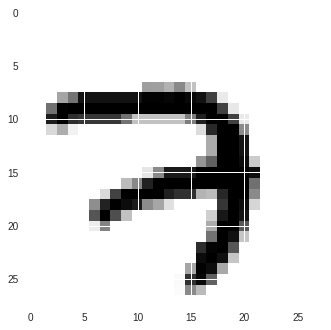

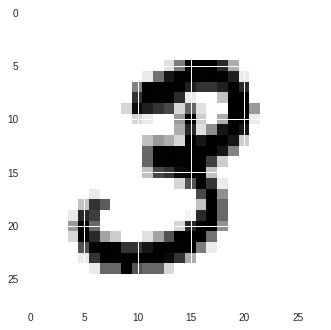

In [0]:
some_digit_list = train_sample[:2]
for some_digit in some_digit_list:
    some_digit_image = some_digit.reshape(28,28) # reshape to square
    plt.imshow(some_digit_image,cmap = plt.cm.binary)
    # plt.axis("off")
    plt.show()

In [0]:
labels_sample[:2] #One hot encoded labels corresponding to the above two digit-images.

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# Model Training
To train the model we pass the training images, the training labels (supervised learning)

To check the performance of the model during training, we also provide the validation data.

A batch size ~ number of images it processes at a time. This depends on the memory. Try out a large value where it fails.

Epoch ~ The number of times the entire dataset is visited during training,

In [0]:
model.fit(train_sample_, labels_sample, epochs=10, batch_size=5000, validation_data=(valid_sample_,labels_validsample))

Train on 50000 samples, validate on 5000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 77us/step - loss: 0.0728 - acc: 0.9770 - val_loss: 0.0563 - val_acc: 0.9840
Epoch 2/10
50000/50000 [==============================] - 3s 56us/step - loss: 0.0682 - acc: 0.9783 - val_loss: 0.0460 - val_acc: 0.9862
Epoch 3/10
50000/50000 [==============================] - 3s 56us/step - loss: 0.0542 - acc: 0.9824 - val_loss: 0.0404 - val_acc: 0.9886
Epoch 4/10
50000/50000 [==============================] - 3s 56us/step - loss: 0.0481 - acc: 0.9847 - val_loss: 0.0388 - val_acc: 0.9890
Epoch 5/10
50000/50000 [==============================] - 3s 56us/step - loss: 0.0459 - acc: 0.9855 - val_loss: 0.0382 - val_acc: 0.9892
Epoch 6/10
50000/50000 [==============================] - 3s 56us/step - loss: 0.0447 - acc: 0.9862 - val_loss: 0.0377 - val_acc: 0.9892
Epoch 7/10
50000/50000 [==============================] - 3s 56us/step - loss: 0.0436 - acc: 0.9866 - val_loss: 0.0372 - val_acc:

# Testing the performance
For the testing, we would not show are labels to the model but only use it to compare with our predictions.

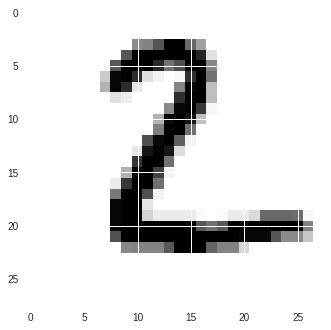

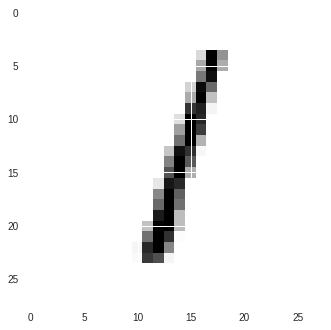

In [0]:
test_data_ = np.reshape(test_data,[-1,28,28,1]) #reshaping to visualize the 1D array as a 2d- image
preds = model.predict(test_data_)

#for each image in test data, the model predicts the probabilities of the image being a digit from 0 to 9
pred_label = [np.argmax(x) for x in preds]

some_digit_list = test_data[1:3]
for some_digit in some_digit_list:
    some_digit_image = some_digit.reshape(28,28) # reshape to square
    plt.imshow(some_digit_image,cmap = plt.cm.binary)
    plt.show()

In [0]:
pred_label[1:3]

[2, 1]

The model seems to be doing fine over some randomly selected data points, but to get a quantitative metric, lets check over all the data points.

In [0]:
accuracy = 0
for pred,actual in zip(pred_label, test_labels):
  if pred == actual:
    accuracy+=1
accuracy = 1.0* accuracy/len(test_labels)

In [0]:
accuracy

0.9863

Which are the failed cases? Can we check those? Could you further improve the performance?